### In this notebook we will be predicting which customers are likely to churn('leave') so that Telecom can intervene.This notebook looks at the machine learning Model built  for predictions.

### The dataset used in this notebook is available at https://www.kaggle.com/datasets/blastchar/telco-customer-churn

#### first thing we need to do is to import libraries t

###### importing libraries

In [1]:
# for Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Display plots in notebook
%matplotlib inline


In [2]:
#loading the dataset
file_path = r'C:\Users\tladi\Desktop\CUSTOMERCHURN.csv'

In [3]:
df = pd.read_csv(r'C:\Users\tladi\Desktop\CUSTOMERCHURN.csv')

In [4]:
#checking if the dataset has been loaded succesfully
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#now we need to encode these categorical features for our Model
encoded_features = pd.get_dummies(df, drop_first=True)

In [15]:
X = encoded_features.drop('Churn_Yes', axis=1)
y = encoded_features['Churn_Yes']

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
encoded_features[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    encoded_features[['tenure', 'MonthlyCharges', 'TotalCharges']]
)


In [17]:
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=42, stratify=y)

In [18]:
#train a model
Lr = LogisticRegression(class_weight = 'balanced', max_iter=1000)
Lr.fit(X_train, y_train)

C:\Users\tladi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [19]:
y_pred = Lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.90      0.72      0.80      1035
        True       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [20]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_test, y_pred)

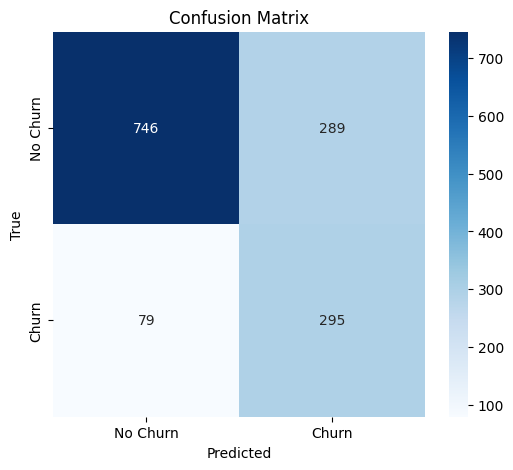

In [21]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(class_weight = 'balanced',random_state=42)
Dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [23]:
y_pred = Dt.predict(X_test)
cm_2 = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.81      0.82      0.82      1035
        True       0.49      0.48      0.49       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



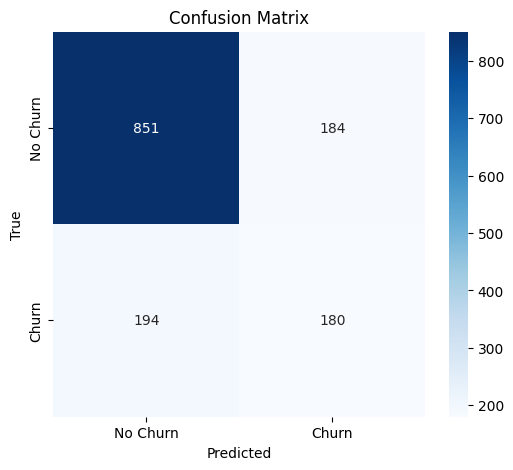

In [24]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(class_weight = 'balanced', random_state=42)
Rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [26]:
y_pred = Rf.predict(X_test)
cm_3 = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1035
        True       0.64      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



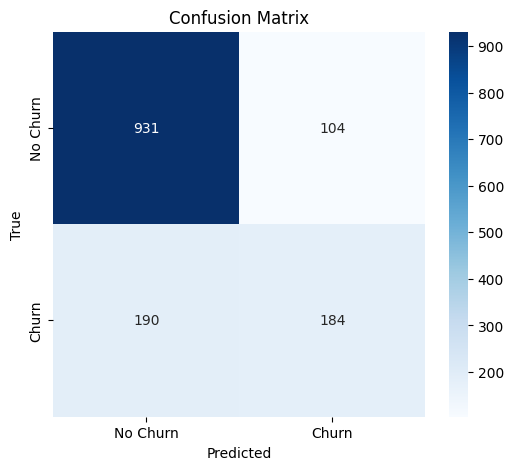

In [27]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
#no we want to compare the three models side by side
from sklearn.metrics import roc_curve, roc_auc_score

# 
y_proba_Lr = Lr.predict_proba(X_test)[:, 1]
y_proba_Dt = Dt.predict_proba(X_test)[:, 1]
y_proba_Rf = Rf.predict_proba(X_test)[:, 1]

#COMPUTE
fpr_Lr, tpr_Lr, _ = roc_curve(y_test, y_proba_Lr)
fpr_Dt, tpr_Dt, _ = roc_curve(y_test, y_proba_Dt)
fpr_Rf, tpr_Rf, _ = roc_curve(y_test, y_proba_Rf)

auc_Lr = roc_auc_score(y_test, y_proba_Lr)
auc_Dt = roc_auc_score(y_test, y_proba_Dt)
auc_Rf = roc_auc_score(y_test, y_proba_Rf)


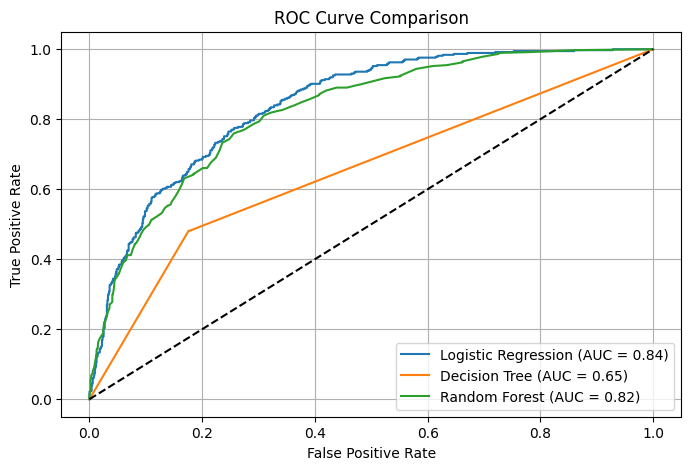

In [29]:
#PLOTTING THE CURVES
plt.figure(figsize=(8, 5))

plt.plot(fpr_Lr, tpr_Lr, label=f'Logistic Regression (AUC = {auc_Lr:.2f})')
plt.plot(fpr_Dt, tpr_Dt, label=f'Decision Tree (AUC = {auc_Dt:.2f})')
plt.plot(fpr_Rf, tpr_Rf, label=f'Random Forest (AUC = {auc_Rf:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [30]:
#LETS COMPARE THEIR CLASSIFICATION REPORTS
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Logistic Regression': Lr,
    'Decision Tree': Dt,
    'Random Forest': Rf
}

# Initialize list to store results
results = []

# Loop through each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # probability for class 1

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba)
    })

# Create DataFrame
results_df = pd.DataFrame(results)

# Display the table sorted by AUC
results_df = results_df.sort_values(by='AUC', ascending=False)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.738822   0.505137  0.788770  0.615866  0.842091
2        Random Forest  0.791341   0.638889  0.491979  0.555891  0.822450
1        Decision Tree  0.731725   0.494505  0.481283  0.487805  0.652218


### the best perfoming model of the three is Logistic Regression 